<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Take-notice!" data-toc-modified-id="Take-notice!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Take notice!</a></span></li><li><span><a href="#Creating-a-function" data-toc-modified-id="Creating-a-function-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating a function</a></span><ul class="toc-item"><li><span><a href="#LA-Times-Neighborhoods" data-toc-modified-id="LA-Times-Neighborhoods-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LA Times Neighborhoods</a></span></li><li><span><a href="#Get-Arrest-Data-from-LA-Open-Data-Portal" data-toc-modified-id="Get-Arrest-Data-from-LA-Open-Data-Portal-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get Arrest Data from LA Open Data Portal</a></span></li><li><span><a href="#Convert-data-to-a-geodataframe" data-toc-modified-id="Convert-data-to-a-geodataframe-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convert data to a geodataframe</a></span></li><li><span><a href="#Create-a-two-layer-map" data-toc-modified-id="Create-a-two-layer-map-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Create a two layer map</a></span></li><li><span><a href="#Zoom-to-the-points,-not-the-neighborhoods" data-toc-modified-id="Zoom-to-the-points,-not-the-neighborhoods-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Zoom to the points, not the neighborhoods</a></span></li></ul></li><li><span><a href="#Function-time" data-toc-modified-id="Function-time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Function time</a></span><ul class="toc-item"><li><span><a href="#Adding-more-arguments" data-toc-modified-id="Adding-more-arguments-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Adding more arguments</a></span></li></ul></li></ul></div>

<div class="alert alert-danger">

<h1>Take notice!</h1>
<ul>
    <li>Make sure you are working with a copy and not the original notebook file</li>
    <li>This class will be recorded</li>
</ul>
    
</div>

# Creating a function

In this lab, we use the Multiple Overlay lab from last week to learn how to convert a process—a chain of commands to produce a desired output—into a function. Functions are extremely useful, can save time, and cut your lines of code dramatically.

First, let's pick off from last week's lab, and create a multi-layered map with geopandas. 

## LA Times Neighborhoods

* [About mapping LA neighborhoods](http://maps.latimes.com/neighborhoods/)
* [Download the data](http://boundaries.latimes.com/sets/)

In [1]:
import geopandas as gpd

# for basemaps
import contextily as ctx

In [2]:
# get neighborhood boundaries from the LA Times
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')

In [3]:
# trim the data to the bare minimum columns
neighborhoods = neighborhoods[['name','geometry']]
neighborhoods.head()

,name,geometry
0,Acton,"MULTIPOLYGON (((-118.20262 34.53899, -118.1894..."
1,Adams-Normandie,"MULTIPOLYGON (((-118.30901 34.03741, -118.3004..."
2,Agoura Hills,"MULTIPOLYGON (((-118.76193 34.16820, -118.7263..."
3,Agua Dulce,"MULTIPOLYGON (((-118.25468 34.55830, -118.2555..."
4,Alhambra,"MULTIPOLYGON (((-118.12175 34.10504, -118.1168..."


In [4]:
# get the layers into a web mercator projection
# reproject to web mercator
neighborhoods = neighborhoods.to_crs(epsg=3857)

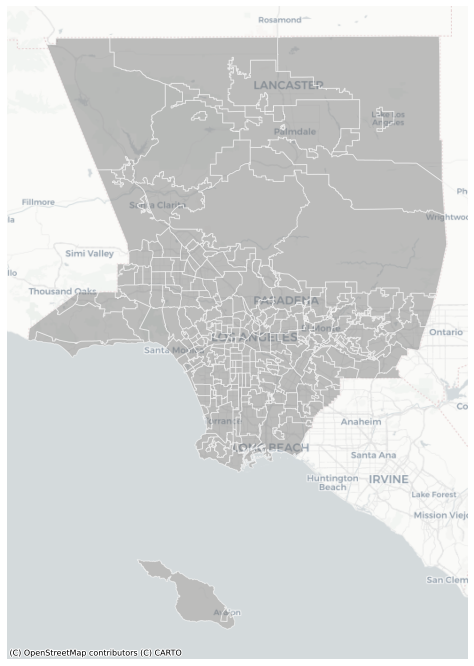

In [5]:
# plot it!
ax=neighborhoods.plot(figsize=(12,12),
                      color='gray', 
                      edgecolor='white',
                      alpha=0.5)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


## Get Arrest Data from LA Open Data Portal
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our arrests data.
- https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [6]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata

In [7]:
# connect to the data portal
client = Socrata("data.lacity.org", None)

results = client.get("amvf-fr72", 
                     limit=5000,
                     where = "arst_date between '2020-09-01T00:00:00' and '2020-09-30T00:00:00'",
                     order='arst_date desc')

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

# print it with .sample, which gives you random rows
df.head()

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,dispo_desc,location,lat,lon,location_1,bkg_date,bkg_time,bgk_location,bkg_loc_cd,crsst
0,6019649,BOOKING,2020-09-26T00:00:00.000,1340,02,Rampart,0269,29,M,B,...,MISDEMEANOR COMPLAINT FILED,1200 W 7TH ST,34.0515,-118.2658,"{'type': 'Point', 'coordinates': [-118.2658, 3...",2020-09-26T00:00:00.000,1612,METRO - JAIL DIVISION,4273,NaN
1,6019527,BOOKING,2020-09-26T00:00:00.000,0615,14,Pacific,1494,26,M,B,...,NaN,400 WORLD WAY WY,33.942,-118.4095,"{'type': 'Point', 'coordinates': [-118.4095, 3...",2020-09-26T00:00:00.000,0819,PACIFIC,4214,NaN
2,6019650,BOOKING,2020-09-26T00:00:00.000,1250,07,Wilshire,0702,53,M,W,...,NaN,SIERRA BONITA,34.0837,-118.3543,"{'type': 'Point', 'coordinates': [-118.3543, 3...",2020-09-26T00:00:00.000,1612,METRO - JAIL DIVISION,4273,MELROSE
3,6019578,BOOKING,2020-09-26T00:00:00.000,0920,15,N Hollywood,1531,41,M,H,...,MISDEMEANOR COMPLAINT FILED,WHITSETT,34.1758,-118.4052,"{'type': 'Point', 'coordinates': [-118.4052, 3...",2020-09-26T00:00:00.000,1120,VALLEY - JAIL DIV,4279,HATTERAS
4,6019399,BOOKING,2020-09-26T00:00:00.000,0105,01,Central,0163,19,M,W,...,MISDEMEANOR COMPLAINT FILED,9TH,34.043,-118.2571,"{'type': 'Point', 'coordinates': [-118.2571, 3...",2020-09-26T00:00:00.000,0225,METRO - JAIL DIVISION,4273,HILL


In [8]:
df.shape

(4360, 25)

In [9]:
# columns
list(df)

['rpt_id',
 'report_type',
 'arst_date',
 'time',
 'area',
 'area_desc',
 'rd',
 'age',
 'sex_cd',
 'descent_cd',
 'chrg_grp_cd',
 'grp_description',
 'arst_typ_cd',
 'charge',
 'chrg_desc',
 'dispo_desc',
 'location',
 'lat',
 'lon',
 'location_1',
 'bkg_date',
 'bkg_time',
 'bgk_location',
 'bkg_loc_cd',
 'crsst']

## Convert data to a geodataframe

Geopandas allows us to convert different types of data into a spatial format.
- https://geopandas.org/gallery/create_geopandas_from_pandas.html

In [10]:
# convert pandas dataframe to geodataframe
arrests = gpd.GeoDataFrame(df, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(df.lon, df.lat))

In [11]:
# get the layers into a web mercator projection
# reproject to web mercator
arrests = arrests.to_crs(epsg=3857)

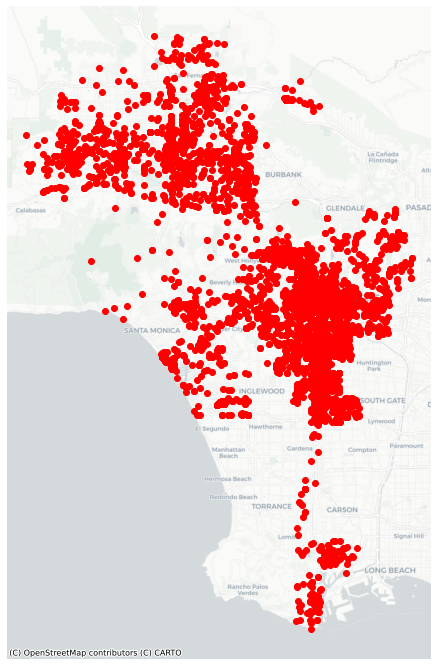

In [12]:
# map it!
ax = arrests.plot(figsize=(12,12),color='red')

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


## Create a two layer map

- https://geopandas.org/mapping.html

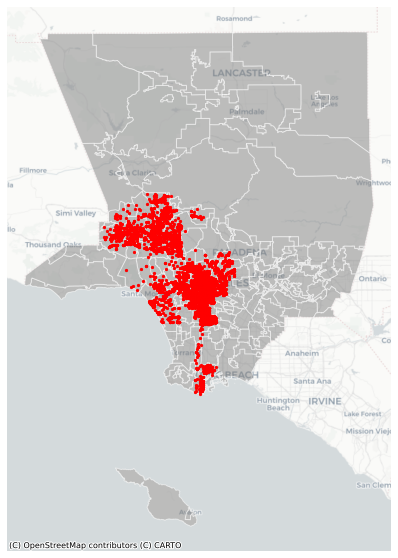

In [13]:
# first define which layers will be your "base"
base = neighborhoods.plot(figsize=(12,10),
                      color='gray', 
                      edgecolor='white',
                      alpha=0.5)

# define the layer that will go on top, and add the base layer to the `ax` argument
ax = arrests.plot(ax=base, color='red', markersize=5)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


## Zoom to the points, not the neighborhoods

By default, the map has zoomed out to fit both layers. Sometimes, we may want to zoom to the extent of a smaller layer, in this case, the crime data.

In [14]:
# get the bounding box coordinates for the crime data
arrests.geometry.total_bounds

array([-13208024.18677467,   3989526.81108362, -13154011.96984178,
         4072673.79123764])

In [15]:
# shortcut to put them into their own variables
minx, miny, maxx, maxy = arrests.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)


-13208024.186774671
-13154011.969841776
3989526.8110836204
4072673.7912376425


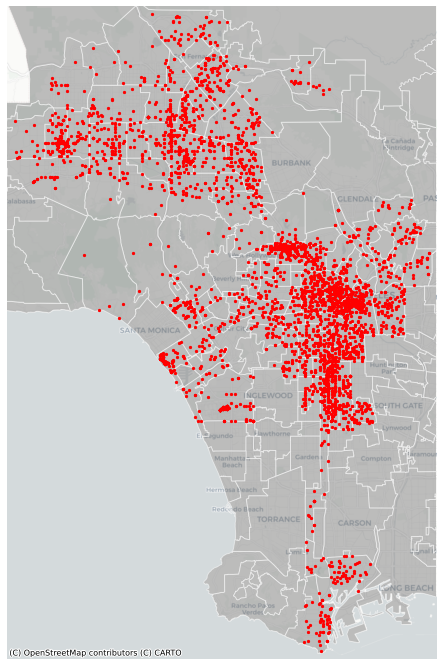

In [16]:
# use the bounding box coordinates to set the x and y limits
base = neighborhoods.plot(figsize=(12,12),
                          color='gray', 
                          edgecolor='white',
                          alpha=0.5)

ax = arrests.plot(ax=base, 
                color='red', 
                markersize=5
               )

ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

ax

# Function time

Our research would like to look at crime at the neighborhood level, rather than as a city as a whole. It would be very useful to have a function that zooms in to a specified neighborhood, and displayed the crime in that neighborhood. Let's create such a function.

Before we create the function, let's experiment with the code that is necessary to create the output for a **single** neighborhood. Let's use "Downtown" for our experiment.

Here are the components of the desired map:

- zoom to a specified neighborhood
- show an outline of the neighborhood
- show arrest data
- add a legend for arrest data type

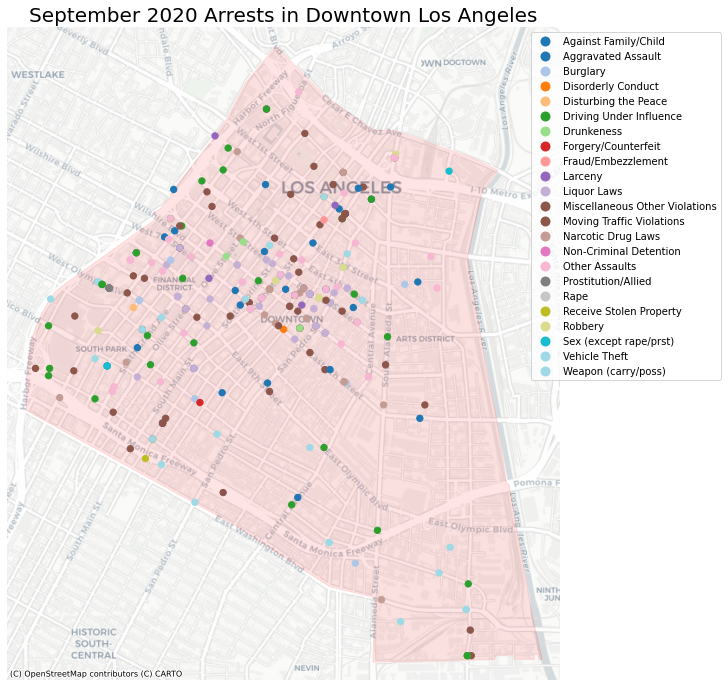

In [17]:
# subset the neighborhoods geodataframe for a single neighborhood
neighborhood = neighborhoods[neighborhoods.name=='Downtown']

# use the bounding box coordinates to set the x and y limits
minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

# do a spatial join to get crime in neighborhood
arrests_in_neighborhood = gpd.sjoin(arrests,neighborhood,how='inner')

# define the base layer to be the neighborhood polygon
base = neighborhood.plot(figsize=(12,12),
                         color='red', 
                         edgecolor='red',
                         alpha=0.1)

# add the crime data, making sure to add the neighborhood polygon
ax = arrests_in_neighborhood.plot(ax=base, 
                                column='grp_description', 
                                markersize=40, 
                                legend=True,
                                cmap='tab20',
                                legend_kwds={
                                   'loc': 'upper right',
                                   'bbox_to_anchor':(1.3,1)
                                }                  # this puts the legend to the side
                            )

# set the map extent to the extent of the neighborhood bounds
ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 200, maxy + 200)

# turn off the axis
ax.axis('off')

# add a title
ax.set_title('September 2020 Arrests in '+neighborhood.name.values[0]+' Los Angeles',fontsize=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax

Now that you know the code above generates the desired output, convert it into a function. Try it in the cell below, by adding the code above below the function declaration `def map_crime_by_neighborhood(place='Downtown'):` and make sure to indent the content inside the function (you can select multiple lines and hit the tab key).

Finally, make sure to replace `'Downtown'` with `place` (without the single quotes) to ensure that the variable for place is passed onto the functon.

Here is a [google slide](https://docs.google.com/presentation/d/e/2PACX-1vTkIEvjQoEvpBP3dmVPStBz1jCCNq4r6DRC9p2P4n_MdARhobk6pwppQpmijzDOZmzvVx49oeaIVXfX/pub?start=false&loop=false&delayms=3000) that describes this function's components.


In [18]:
def map_arrests_by_neighborhood(place='Downtown'):
    
    # subset the neighborhoods geodataframe for a single neighborhood
    neighborhood = neighborhoods[neighborhoods.name==place]

    # use the bounding box coordinates to set the x and y limits
    minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

    # do a spatial join to get crime in neighborhood
    arrests_in_neighborhood = gpd.sjoin(arrests,neighborhood,how='inner')

    # define the base layer to be the neighborhood polygon
    base = neighborhood.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.1)

    # add the crime data, making sure to add the neighborhood polygon
    ax = arrests_in_neighborhood.plot(ax=base, 
                                    column='grp_description', 
                                    markersize=40, 
                                    legend=True,
                                    cmap='tab20',
                                    legend_kwds={
                                       'loc': 'upper right',
                                       'bbox_to_anchor':(1.3,1)
                                    }                  # this puts the legend to the side
                                )

    # set the map extent to the extent of the neighborhood bounds
    ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
    ax.set_ylim(miny - 200, maxy + 200)

    # turn off the axis
    ax.axis('off')

    # add a title
    ax.set_title('September 2020 Arrests in '+neighborhood.name.values[0]+' Los Angeles',fontsize=20)

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax

In [21]:
list(neighborhoods.name)


['Acton',
 'Adams-Normandie',
 'Agoura Hills',
 'Agua Dulce',
 'Alhambra',
 'Alondra Park',
 'Altadena',
 'Angeles Crest',
 'Arcadia',
 'Arleta',
 'Arlington Heights',
 'Artesia',
 'Athens',
 'Atwater Village',
 'Avalon',
 'Avocado Heights',
 'Azusa',
 'Baldwin Hills/Crenshaw',
 'Baldwin Park',
 'Bel-Air',
 'Bellflower',
 'Bell Gardens',
 'Bell',
 'Beverly Crest',
 'Beverly Grove',
 'Beverly Hills',
 'Beverlywood',
 'Boyle Heights',
 'Bradbury',
 'Brentwood',
 'Broadway-Manchester',
 'Burbank',
 'Calabasas',
 'Canoga Park',
 'Carson',
 'Carthay',
 'Castaic Canyons',
 'Castaic',
 'Central-Alameda',
 'Century City',
 'Cerritos',
 'Charter Oak',
 'Chatsworth',
 'Chatsworth Reservoir',
 'Chesterfield Square',
 'Cheviot Hills',
 'Chinatown',
 'Citrus',
 'Claremont',
 'Commerce',
 'Compton',
 'Covina',
 'Cudahy',
 'Culver City',
 'Cypress Park',
 'Del Aire',
 'Del Rey',
 'Desert View Highlands',
 'Diamond Bar',
 'Downey',
 'Downtown',
 'Duarte',
 'Eagle Rock',
 'East Compton',
 'East Hollywo

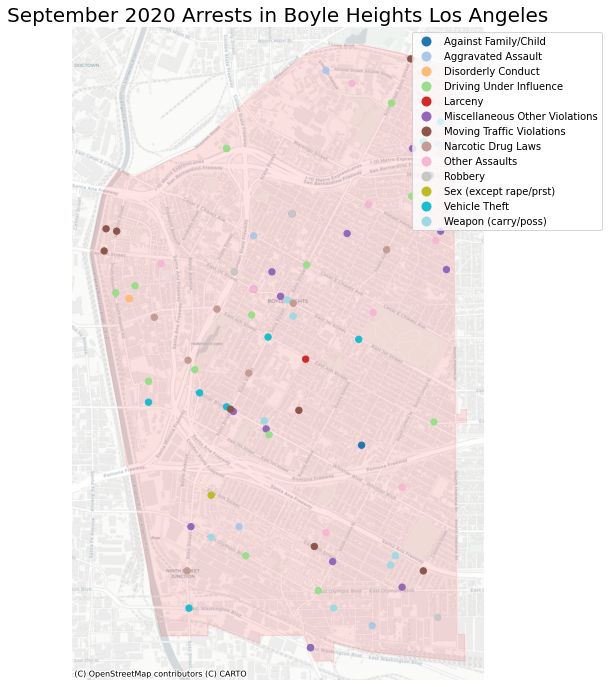

In [22]:
# call the function!
map_arrests_by_neighborhood(place='Boyle Heights')

## Adding more arguments

So far, our function accepts a single argument for `place.` What if we also wanted to provide the option on how to color code the arrest points? We can add another argument for `column`:

In [23]:
def map_arrests_by_neighborhood(place='Downtown', column='grp_description'): # added another argument here
    # subset the neighborhoods geodataframe for a single neighborhood
    neighborhood = neighborhoods[neighborhoods.name==place]

    # use the bounding box coordinates to set the x and y limits
    minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

    # do a spatial join to get crime in neighborhood
    arrests_in_neighborhood = gpd.sjoin(arrests,neighborhood,how='inner')

    # define the base layer to be the neighborhood polygon
    base = neighborhood.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.2)

    # add the crime data, making sure to add the neighborhood polygon
    ax = arrests_in_neighborhood.plot(ax=base, 
                                    column=column, ## notice that the column is now dependent on the variable being fed
                                    markersize=40, 
                                    legend=True,
                                    cmap='tab20',
                                    legend_kwds={
                                       'loc': 'upper right',
                                       'bbox_to_anchor':(1.3,1)
                                    }                  # this puts the legend to the side
                                )

    # set the map extent to the extent of the neighborhood bounds
    ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
    ax.set_ylim(miny - 200, maxy + 200)

    # turn off the axis
    ax.axis('off')

    # add a title
    ax.set_title('September 2020 Crime Incidents in '+neighborhood.name.values[0]+' Los Angeles',fontsize=20)

    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax

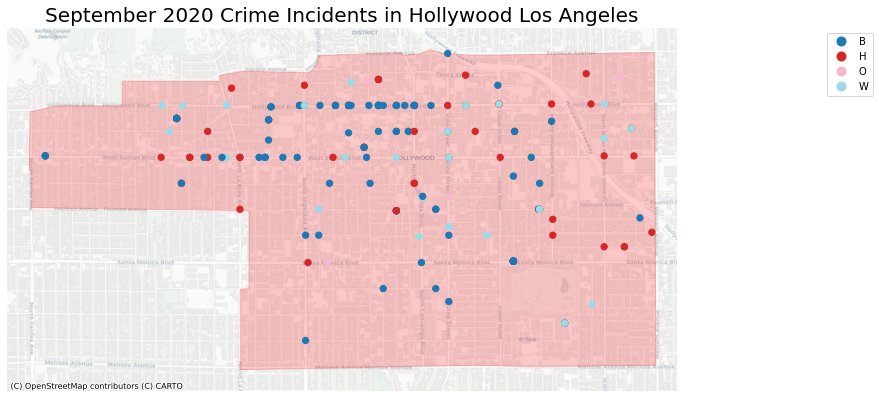

In [25]:
# run the function
map_arrests_by_neighborhood(place='Hollywood',column='descent_cd')